In [1]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from scipy.fftpack import * 

~~施工中~~

进行2D FFT测试，去趋势之后得到2D PSD之后合并在1D上


数据读入部分

In [2]:
ke_sum = {}
dir_out = "/raid52/yycheng/MPAS/RCM_postprocess/RCM_merge/ke_daily_vi/"
ds_ke_sum = xr.open_dataset(dir_out + "ke_all_400-100_hPa_vi.nc")
ke_sum['rcm'] = ds_ke_sum['vertical integration Ke']

dir_out = "/raid52/yycheng/MPAS/VR_postprocess/VR_merge/ke_daily_vi/"
ds_ke_sum = xr.open_dataset(dir_out + "ke_all_400-100_hPa_vi.nc")
ke_sum['vr'] = ds_ke_sum['vertical integration Ke']

In [3]:
# 通过外插，去除掉边界上因RCM范围选取问题产生的nan的点
ke_sum_rmnan = {}
ke_sum_rmnan['vr'] = ke_sum['vr'].interpolate_na(dim = 'longitude', method = 'cubic', max_gap = None, fill_value="extrapolate")
ke_sum_rmnan['rcm'] = ke_sum['rcm'].interpolate_na(dim = 'longitude', method = 'cubic', max_gap = None, fill_value="extrapolate")

In [34]:
ke_sum_rmnan['vr'].shape

(3085, 160, 280)

In [41]:
# 去趋势，进行2D FFT
from scipy import signal
ke_sum_detrend = ke_sum_rmnan.copy()
for ikey in ke_sum_detrend.keys():
    ke_sum_detrend[ikey] = signal.detrend( ke_sum_detrend[ikey] , axis = 1, type = 'linear')
    ke_sum_detrend[ikey] = signal.detrend( ke_sum_detrend[ikey] , axis = 2, type = 'linear')

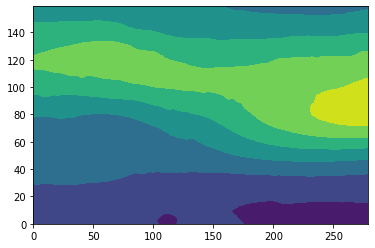

In [64]:
plt.contourf(ke_sum_rmnan['vr'].mean(axis=0))

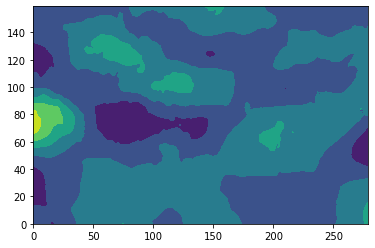

In [63]:
plt.contourf(ke_sum_detrend['vr'].mean(axis=0))

In [59]:
# 2D fft
# ke_vi_sum # Time x lat x lon : 3080 x 160 x 280
res_dftn = {}
# res_dftn['vr'] = fft2(ke_sum_rmnan['vr'].values, axes = [1,2])
# res_dftn['rcm'] = fft2(ke_sum_rmnan['rcm'].values, axes = [1,2])

res_dftn['vr'] = fft2(ke_sum_detrend['vr'], axes = [1,2])
res_dftn['rcm'] = fft2(ke_sum_detrend['rcm'], axes = [1,2])

In [60]:
# 添加维度参数
ntime = res_dftn['vr'].shape[0]
nlat  = res_dftn['vr'].shape[1]
nlon  = res_dftn['vr'].shape[2]
# 添加频谱参数

In [61]:
# 移动零频率到中心
dftn_shift  = {}
dftn_timean = {}
# dftn_timean['vr'] = res_dftn['vr'].mean(axis=0)
dftn_shift['vr']  = fftshift(res_dftn['vr'].mean(axis=0), axes=[0,1])

# dftn_timean['rcm'] = res_dftn['rcm'].mean(axis=0)
dftn_shift['rcm']  = fftshift(res_dftn['rcm'].mean(axis=0), axes=[0,1])

# plt.contourf(np.log(np.abs(dftn_shift[nlat//2:,nlon//2:])))
# plt.colorbar()

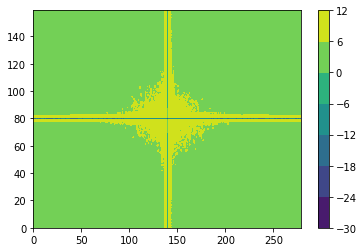

In [65]:
# plt.contourf(np.log(np.abs(dftn_shift['vr'][nlat//2:,nlon//2:])))
plt.contourf(np.log(np.abs(dftn_shift['vr'][:,:])))
plt.colorbar()